# Linear regression

Start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

The [data](https://www.statsmodels.org/devel/datasets/generated/engel.html) contained in the `df` DataFrame represents **income** and **food expenditure** for 235 working class households in 1857 Belgium. It was loaded from `statsmodels`' library using  its [Dataset Package](https://www.statsmodels.org/devel/datasets/index.html). 



In [2]:
# run this cell (do not delete it)
df = sm.datasets.engel.load_pandas().data
df.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


We want to analize the relation beetween the variables "income" and "Foodexp" we can start by using a scatterplot to better visualize the data

<AxesSubplot: xlabel='income', ylabel='foodexp'>

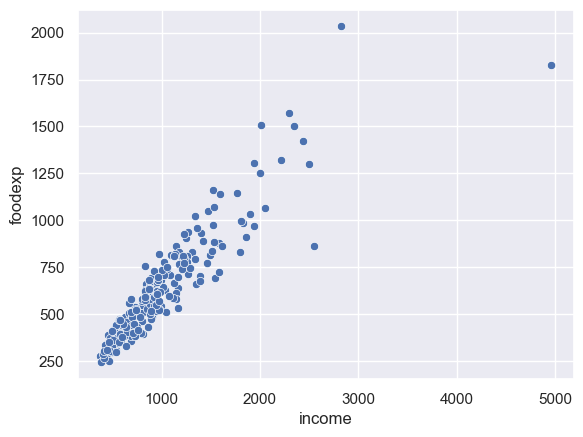

In [39]:
sns.scatterplot(data=df, x="income", y="foodexp")


From the scatterplot we can assume that there is a correlation beetween the two factor, but we will avoid to trust only our eyes and use an appropriate command so that we can verificate the correlation

In [40]:
correl = df.income.corr(df.foodexp)
print('Correlation coefficient between X and Y:', round(correl, 2))

Correlation coefficient between X and Y: 0.91


In the scatterplot you can see some dots that distance themselves quite a lot from the bulk of the data, we could start to think that they are outliers but they definitely lay in a range of possible income and food expenditure values. Extreme values should be kept in the dataset, because they are part of the data and contain important information about the dispersion of the feature we're studying. 

Using the `statsmodels` package, we can define a linear regression model that fits the data. Specifically, we use `foodexp` as the dependent variable and `income` as the predictor

In [41]:
Y = df['foodexp']
X = df['income']
X = sm.add_constant(data=X)   # add a constant to the model
model = sm.OLS(endog=Y,exog=X)
results = model.fit()

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                foodexp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1141.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           9.92e-92
Time:                        15:02:50   Log-Likelihood:                -1445.7
No. Observations:                 235   AIC:                             2895.
Df Residuals:                     233   BIC:                             2902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.4754     15.957      9.242      0.000     116.037     178.914
income         0.4852      0.014     33.772      0.000       0.457       0.513
==============================================================================
Omnibus:                       68.110   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              927.676
Skew:                          -0.670   Prob(JB):                    3.61e-202
Kurtosis:                      12.641   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Both the intercept and the slope coefficient for the `income` predictor are statistically significant. In other words, the null hypothesis that the coefficient is zero (and that therefore there is no relationship between the two variables) has been rejected at a significance level $\alpha = 0.05$. The model is fitting the data very well, as it can be confirmed by the coefficient of determination $R^2 = 0.83$. 

In [43]:
intercept = 147.4754
slope = 0.4852

Let's plot the data using a scatterplot and let's use intercept and slope that we found to draw a regression line on it

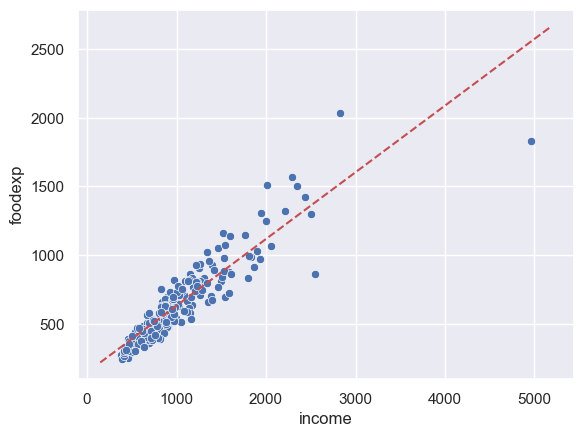

In [44]:
sns.scatterplot(x='income', y='foodexp', data=df)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot

plt.show()

Now, since we have a working model we can make a prediction base on one of the two variables that we have, for example: How much a family with 3000 Belgian francs (in 1875) would spend in food? 

In [45]:
results.predict(np.array([1,3000]))

array([1603.01065955])

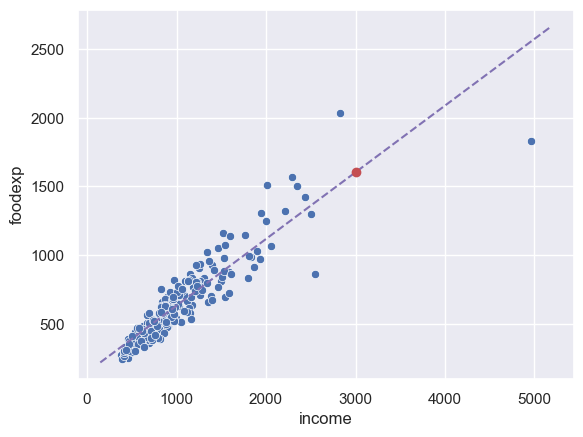

In [46]:
sns.scatterplot(x='income', y='foodexp', data=df)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='m')   # draw the regression line on top of the scatter plot

# plot the new observed x-value and the relative prediction
plt.plot(3000, results.predict(np.array([1, 3000]))[0], 'ro')

plt.show()